In [126]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import itertools
from Main_full import main
from heapq import nlargest
from sklearn.cluster import KMeans

In [162]:
n=1000
k=10
X=np.random.normal(scale=2,size=[n,1])
Y=2*X**2+np.random.normal(scale=0.6,size=[n,1])
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

x=[]
y=[]
# create the KMeans object with k clusters and fit the data X
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
for c in range(k):
    cluster_indices = np.where(kmeans.labels_ == c)[0]
    x.append(X[cluster_indices])
    y.append(Y[cluster_indices])
# retrieve the data points from X that belong to cluster label k
# Xc = X[cluster_indices]
# Yc=Y[cluster_indices]
# b=np.linalg.inv(Xc.T@Xc)@Xc.T@Yc
# res=Yc-b*Xc
# B=100
# l=5
# plt.scatter(Xc,res)

In [159]:
R=dic[()]

In [163]:
E=len(x)
l=2
n,d=x[0].shape
temp=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in temp for item in sublist]
dic={}
for ind in subsets:
    R=[]
    for i in range(E):
        n,d=x[i].shape
        if len(ind)==0:
            R.append(y[i])
        else:
            xtemp=x[i][:,ind]
            ind=np.array(ind)
            beta_hat=np.linalg.inv(xtemp.T@xtemp)@(xtemp.T)@y[i]
            R.append(y[i]-xtemp@beta_hat)
    dic[tuple(ind)]=copy.copy(R)
S_ini=[]
for k in dic:
    Res=dic[k]
    pval=0
    n=len(Res)
    for b in range(B):
        a=np.random.chisquare(n-len(k),E)
        T=[np.sum(r**2) for r in Res]
#                 if np.min(T)/np.max(T)>np.min(a)/np.max(a):
#                     pval+=1/B
        T_b=np.sort(a,kind='mergesort')
        T_data=np.sort(T,kind='mergesort')
        if np.sum(T_data[:l])/np.sum(T_data[-l:])>np.sum(T_b[:l])/np.sum(T_b[-l:]):
            pval+=1/B
    print(k)
    print(pval)
    if pval>0.05:
        S_ini.append(k)
print([set(S_ini[k]) for k in range(len(S_ini))])

()
0
(0,)
0
[]


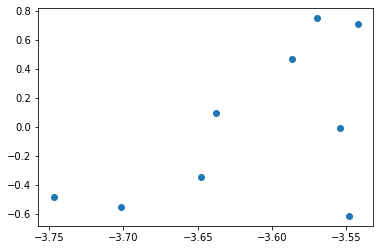

In [111]:
Xc = x[30]
Yc=y[30]
b=np.linalg.inv(Xc.T@Xc)@Xc.T@Yc
res=Yc-b*Xc
plt.scatter(Xc,res)

Sample Size 1 of 4
Sample Size 2 of 4
Sample Size 3 of 4
Sample Size 4 of 4


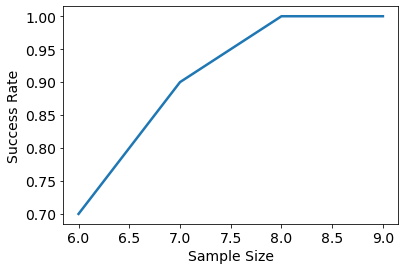

In [125]:
### Here we use i.i.d data to create Figure 1a
np.random.seed(0)
d=5  #Dimensionality
s=2  #Number of support entries
samples=[6,7,8,9]  #Sample Sizes
success=np.zeros(len(samples))
runs=10
l=5 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=20      #Number of Intervals 
lam=0   #Lambda
a=[list(itertools.combinations(range(d), k)) for k in range(0,d)]
subsets = [item for sublist in a for item in sublist]
dic={}
for o,n in enumerate(samples):
    print('Sample Size',o+1,'of',len(samples))
    for r in range(runs):
        x=np.zeros((I,n,d))
        y=np.zeros((I,n))
        betas=np.zeros((I,d))
        R=np.zeros((I,n))
        for i in range(I):
            b=np.random.uniform(low=0,high=30,size=(d))
            a=np.random.uniform(low=-30,high=0,size=(d))
            for p in range(d):
                x[i,:,p]=np.random.uniform(low=a[p],high=b[p],size=(n))
            betas[i,:s]=np.random.uniform(low=-1,high=4,size=(s))
#             e=np.random.multivariate_normal(np.zeros(n),np.eye(n))
            e=np.random.uniform(low=-0.5,high=0.5,size=(n))
            y[i,:]=x[i,:,:]@betas[i,:]+e
            x[i,:,4]=betas[i,0]*y[i,:]+np.random.uniform(low=a[p],high=b[p],size=(n))

      
        plausibleS=main(x,y,B,l)
        if not not plausibleS:
            if tuple(set.intersection(*plausibleS))==(0,1):
                success[o]+=1
success=success/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(samples,success,linewidth=2.5)
plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('Success Rate',fontsize=14)
plt.savefig('andersIID.eps', format='eps')

In [124]:
e=np.random.multivariate_normal(np.zeros(n),np.eye(n))
# e=np.random.uniform(low=-0.5,high=0.5,size=(n,1))
e.shape

(6,)

In [ ]:
### Here we use i.i.d data to create Figure 1a
np.random.seed(0)
d=5  #Dimensionality
s=2  #Number of support entries
samples=[6,7,8,9]  #Sample Sizes
success=np.zeros(len(samples))
runs=10
l=5 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=20      #Number of Intervals 
lam=0   #Lambda
a=[list(itertools.combinations(range(d), k)) for k in range(0,d)]
subsets = [item for sublist in a for item in sublist]
dic={}
for o,n in enumerate(samples):
    print('Sample Size',o+1,'of',len(samples))
    for r in range(runs):
        x=np.zeros((I,n,d))
        y=np.zeros((I,n))
        betas=np.zeros((I,d))
        R=np.zeros((I,n))
        for i in range(I):
            b=np.random.uniform(low=0,high=30,size=(d))
            a=np.random.uniform(low=-30,high=0,size=(d))
            for p in range(d):
                x[i,:,p]=np.random.uniform(low=a[p],high=b[p],size=(n))
            betas[i,:s]=np.random.uniform(low=-1,high=4,size=(s))
            e=np.random.multivariate_normal(np.zeros(n),np.eye(n))
            y[i,:]=x[i,:,:]@betas[i,:]+e
            x[i,:,4]=betas[i,0]*y[i,:]+np.random.uniform(low=a[p],high=b[p],size=(n))

        for ind in subsets:
            for i in range(I):
                if len(ind)==0:
                    R[i,:]=y[i,:]
                else:
                    ind=np.array(ind)
                    beta_hat=np.linalg.inv(x[i,:,ind]@x[i,:,ind].T+lam*np.eye(len(ind)))@(x[i,:,ind])@y[i,:]
                    R[i,:]=y[i,:]-x[i,:,ind].T@beta_hat
            dic[tuple(ind)]=copy.copy(R)
        S_ini=[]
        for k in dic:
            Res=dic[k]
            pval=0
            for b in range(B):
                a=np.random.chisquare(n-len(k),I)
                T=np.sum(Res**2,axis=1)
#                 if np.min(T)/np.max(T)>np.min(a)/np.max(a):
#                     pval+=1/B
                T_b=np.sort(a,kind='mergesort')
                T_data=np.sort(T,kind='mergesort')
                if np.sum(T_data[:l])/np.sum(T_data[-l:])>np.sum(T_b[:l])/np.sum(T_b[-l:]):
                    pval+=1/B
            if pval>0.05:
                S_ini.append(k)
        plausibleS=[set(S_ini[k]) for k in range(len(S_ini))]
        if not not plausibleS:
            if tuple(set.intersection(*plausibleS))==(0,1):
                success[o]+=1
success=success/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(samples,success,linewidth=2.5)
plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('Success Rate',fontsize=14)
plt.savefig('andersIID.eps', format='eps')

In [ ]:
a=Res.flatten()
print(a[:2])
print(a[-2:])

In [ ]:
### Here we use i.i.d data to create Figure 1a
np.random.seed(0)
d=5  #Dimensionality
s=2  #Number of support entries
samples=[3,4,5,6,7,8,9,10]  #Sample Sizes
success=np.zeros(len(samples))
runs=10
I=100      #Number of Intervals 
lam=0.01   #Lambda
a=[list(itertools.combinations((0,1,2,3,4), k)) for k in range(0,d)]
subsets = [item for sublist in a for item in sublist]
dic={}
for o,n in enumerate(samples):
    print('Sample Size',o+1,'of',len(samples))
    for r in range(runs):
        x=np.zeros((I,n,d))
        y=np.zeros((I,n))
        betas=np.zeros((I,d))
        R=np.zeros((I,n))
        for i in range(I):
            b=np.random.uniform(low=0,high=30,size=(d))
            a=np.random.uniform(low=-30,high=0,size=(d))
            for p in range(d):
                x[i,:,p]=np.random.uniform(low=a[p],high=b[p],size=(n))
            betas[i,:s]=np.random.uniform(low=-1,high=4,size=(s))
            e=np.random.multivariate_normal(np.zeros(n),np.eye(n))
            y[i,:]=x[i,:,:]@betas[i,:]+e

        for ind in subsets:
            for i in range(I):
                if len(ind)==0:
                    R[i,:]=y[i,:]
                else:
                    ind=np.array(ind)
                    beta_hat=np.linalg.inv(x[i,:,ind]@x[i,:,ind].T+lam*np.eye(len(ind)))@(x[i,:,ind])@y[i,:]
                    R[i,:]=y[i,:]-x[i,:,ind].T@beta_hat
            dic[tuple(ind)]=copy.copy(R)
        S_ini=[]
        for k in dic:
            Res=dic[k]
            pval=scipy.stats.anderson_ksamp(Res)[2]
            if pval>0.05:
                S_ini.append(k)
        plausibleS=[set(S_ini[k]) for k in range(len(S_ini))]
        if not not plausibleS:
            if tuple(set.intersection(*plausibleS))==(0,1):
                success[o]+=1
success=success/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(samples,success,linewidth=2.5)
plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('Success Rate',fontsize=14)
plt.savefig('andersIID.eps', format='eps')